In [3]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [4]:
# Black-Scholes formula implementation
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes price for European call or put options.

    Parameters:
        S : float - current stock price
        K : float - strike price
        T : float - time to maturity (in years)
        r : float - risk-free interest rate (as decimal)
        sigma : float - volatility of the underlying (as decimal)
        option_type : 'call' or 'put'

    Returns:
        option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price

In [5]:
# Example Inputs
S = 100     # Current stock price
K = 100     # Strike price
T = 1       # Time to maturity in years
r = 0.05    # Risk-free rate (5%)
sigma = 0.2 # Volatility (20%)

In [6]:
# Calculate prices
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")

Call Option Price: $10.45
Put Option Price: $5.57


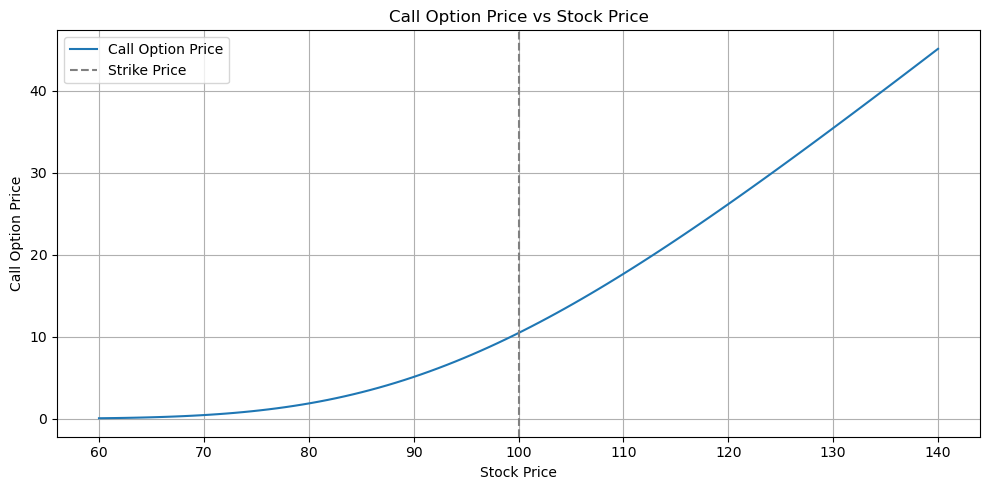

In [7]:
# Plot call option prices vs stock price
stock_prices = np.linspace(60, 140, 100)
call_prices = [black_scholes(S, K, T, r, sigma, 'call') for S in stock_prices]

plt.figure(figsize=(10, 5))
plt.plot(stock_prices, call_prices, label='Call Option Price')
plt.axvline(x=K, color='grey', linestyle='--', label='Strike Price')
plt.title('Call Option Price vs Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Call Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("option_plot.png")  # Save the image for README
plt.show()